In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 1: Load the data with specified data types and parse dates
df = pd.read_csv('default_online_electronics_store.csv',parse_dates=['order_date'])

In [3]:
# Convert problematic columns to numeric, coercing errors to NaN
df['percent_discount'] = pd.to_numeric(df['percent_discount'], errors='coerce')
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')
df['percent_profit_margin'] = pd.to_numeric(df['percent_profit_margin'], errors='coerce')

# Handle NaN values if needed (e.g., fill with 0 or mean, drop, etc.)
df['percent_discount'].fillna(0, inplace=True)
df['discount'].fillna(0, inplace=True)
df['percent_profit_margin'].fillna(0, inplace=True)


In [4]:
# Step 1: Load the data with specified data types and parse dates
df = pd.read_csv('default_online_electronics_store.csv',parse_dates=['order_date'])

In [5]:
# order date as index
df.set_index('order_date', inplace=True) 

In [6]:
# Step 3: Prepare the time series data
# For this example, let's assume we want to predict daily profit
daily_profit = df['profit_margin'].resample('D').sum()

In [8]:
# Split data into training and test sets
train_size = int(len(daily_profit) * 0.8)
train, test = daily_profit[:train_size], daily_profit[train_size:]

In [9]:
# Step 4: Fit the ARIMA model
# Use auto_arima to find the best parameters
model = auto_arima(train, seasonal=False, trace=True,
                   error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5584.867, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5690.106, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5623.889, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5580.781, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5688.148, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5582.547, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5584.231, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5583.567, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5579.072, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5580.988, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5581.060, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5622.098, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5581.728, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.803 seconds


In [10]:
# Print the summary of the model
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2787.536
Date:                Tue, 21 May 2024   AIC                           5579.072
Time:                        17:27:54   BIC                           5586.418
Sample:                    01-01-2019   HQIC                          5582.015
                         - 10-19-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6654      0.039    -17.122      0.000      -0.742      -0.589
sigma2      1.206e+07   8.11e+05     14.859      0.000    1.05e+07    1.36e+07
Ljung-Box (L1) (Q):                   0.91   Jarque-

In [11]:
# Fit the ARIMA model
arima_model = ARIMA(train, order=model.order)
arima_result = arima_model.fit()

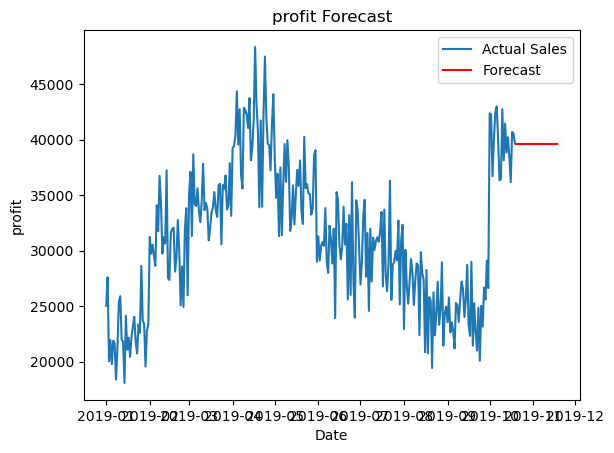

In [12]:
# Step 5: Forecast future values
# Forecast the next 30 days
forecast = arima_result.forecast(steps=30)

# Plot the results

plt.plot(train, label='Actual Sales')
plt.plot(forecast, label='Forecast', color='red')
plt.title('profit Forecast')
plt.xlabel('Date')
plt.ylabel('profit')
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
model = auto_arima(train, seasonal=True, m=12, trace=True,
                   error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5585.853, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5690.106, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5623.200, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5579.558, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5688.148, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5580.781, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5581.262, Time=0.15 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=5580.860, Time=0.19 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=5579.998, Time=0.07 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=5582.760, Time=0.34 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5687.570, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5582.397, Time=0.13 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=5581.550, Time=0.28 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=5623.367, Time=0.08 sec
 ARIMA(1,1,2)(0,0,1

In [15]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  292
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood               -2786.347
Date:                             Tue, 21 May 2024   AIC                           5578.695
Time:                                     17:28:10   BIC                           5589.715
Sample:                                 01-01-2019   HQIC                          5583.109
                                      - 10-19-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6616      0.040    -16.674      0.000      -0.739      -0.584
ar.S.L12      -0.0870      

In [16]:
# Fit the SARIMA model
sarima_model = SARIMAX(train, order=model.order, seasonal_order=model.seasonal_order)
sarima_result = sarima_model.fit()

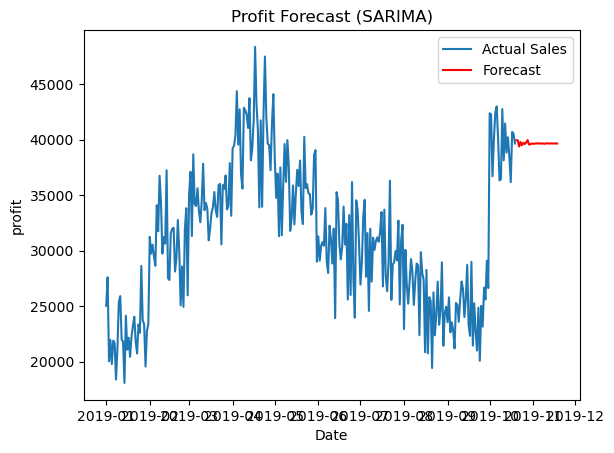

In [17]:
# Forecast the next 30 days
forecast = sarima_result.forecast(steps=30)
# Plot the results
plt.plot(train, label='Actual Sales')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Profit Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('profit')
plt.legend()
plt.show()

In [20]:
# Forecast on the test data
import numpy as np
from sklearn.metrics import mean_squared_error
forecast = arima_result.forecast(steps=len(test))

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

RMSE: 7002.99107901782


In [21]:
forecast = sarima_result.forecast(steps=len(test))

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

RMSE: 7026.398514686343
